<a href="https://colab.research.google.com/github/MilenaKalo/breedClassification/blob/main/UTSoftware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

# Imports

In [1]:
#Import
# wenn libary nicht vorhanden, dann open example öffnen und die commands ausführen lassen 

import csv
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive
import shutil


# drive mounting 

In [2]:
#Mounting the drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [8]:
#change cd to the right path 
%cd /content/gdrive

/content/gdrive


In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./MyDrive/Colab Notebooks/Dataset 1/low-resolution'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# erstelle Train Ordner 

In [ ]:
# Ordner für Trainingsdaten erstellen
%cd /content/gdrive/MyDrive/Colab\ Notebooks

train_directory = "train"
os.mkdir(train_directory)
train_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/train.csv")
folder_names_train = train_data["breed"].unique()
for folder_name in folder_names_train:
     os.mkdir("train/" + folder_name)
filename_train = '"/content/gdrive/MyDrive/Colab Notebooks/train.csv"'
with open(filename_train, 'r') as csvfile:
     datareader = csv.reader(csvfile)
     next(datareader)
     for row in datareader:
         # Falls Pfad "root" enthält, dann löschen
         if "root" in row[0]:
             row[0] = row[0].replace("/root", "")
         file = row[0] + "/" + row[1]
         original = r'/content/gdrive/MyDrive/Colab Notebooks/'+file
         target = r'/content/gdrive/MyDrive/Colab Notebooks/train/'+row[2]+'/'+row[1]
         shutil.copy(original, target)


# erstelle Validate Ordner 

In [ ]:
#Ordner für Validierungsdaten erstellen
%cd /content/gdrive/MyDrive/Colab\ Notebooks

validate_directory = "validate"
os.mkdir(validate_directory)

validate_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/validate.csv")
folder_names_validate = validate_data["breed"].unique()

for folder_name in folder_names_validate:
     os.mkdir("validate/" + folder_name)

filename_validate = '/content/gdrive/MyDrive/Colab Notebooks/validate.csv'
with open(filename_validate, 'r') as csvfile:
     datareader = csv.reader(csvfile)
     next(datareader)

     for row in datareader:
         # Falls Pfad "root" enthält, dann löschen
         if "root" in row[0]:
             row[0] = row[0].replace("/root", "")

         file = row[0] + "/" + row[1]
         original = r'/content/gdrive/MyDrive/Colab Notebooks/'+file
         target = r'/content/gdrive/MyDrive/Colab Notebooks/validate/'+row[2]+'/'+row[1]
         shutil.copy(original, target)

# erstelle Test Ordner

In [ ]:
# Ordner für Testdaten erstellen
%cd /content/gdrive/MyDrive/Colab\ Notebooks

test_directory = "test"
os.mkdir(test_directory)

test_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/test.csv")
folder_names_test = test_data["breed"].unique()

for folder_name in folder_names_test:
     os.mkdir("test/" + folder_name)

filename_test = '/content/gdrive/MyDrive/Colab Notebooks/test.csv'
with open(filename_test, 'r') as csvfile:
     datareader = csv.reader(csvfile)
     next(datareader)

     for row in datareader:
         # Falls Pfad "root" enthält, dann löschen
         if "root" in row[0]:
             row[0] = row[0].replace("/root", "")

         file = row[0] + "/" + row[1]
         original = r'/content/gdrive/MyDrive/Colab Notebooks/'+file
         target = r'/content/gdrive/MyDrive/Colab Notebooks/test/'+row[2]+'/'+row[1]
         shutil.copy(original, target)
         

# looking how a image look like 

In [9]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/train.csv", nrows=1)  
print(dataframe)

#data row one passt noch nict ganz 
data_row_one =str("/content/gdrive/MyDrive/Colab Notebooks/"+ dataframe["path"] +"/"+ dataframe["id"])
print(data_row_one)
print(type(data_row_one))
data_row_two = dataframe["path"]
print(data_row_two)
test = dataframe["id"]
#print(test)

                                              path           id       breed
0  Dataset_1/low-resolution/201-n000024-schipperke  n110423.jpg  schipperke
0    /content/gdrive/MyDrive/Colab Notebooks/Datase...
dtype: object
<class 'str'>
0    Dataset_1/low-resolution/201-n000024-schipperke
Name: path, dtype: object


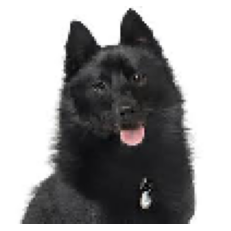

In [ ]:
#Displaying the image
img = load_img("/content/gdrive/MyDrive/Colab Notebooks/Dataset_1/low-resolution/201-n000024-schipperke/n110347.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


# Modell erstellen 

In [ ]:
#Finding number of classes
train_data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/train.csv")

className = train_data["breed"].unique()
number_of_class = len(className)
print(number_of_class)

142


In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                  

In [ ]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [ ]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/test"

validate_path = "/content/gdrive/MyDrive/Colab Notebooks/validate"

#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = validate_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

In [ ]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

# Plotten

In [ ]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

In [ ]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

# Prediction

In [ ]:
#Displaying the selected image
img = load_img(validate_path + "/schipperke/n110509.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/gdrive/MyDrive/Colab Notebooks/validate/schipperke/n110509.jpg')

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

In [ ]:
#Printing class dictionary
print(test_generator.class_indices)